# 

In [7]:
# from nltk.tokenize import word_tokenize
# from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
import os
import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1 Name Entity Recognition (NER)
### SpaCy Library NER

In [8]:
nlp = spacy.load('en_core_web_sm')

In [9]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [10]:
ny_bb = url_to_string('https://www.aljazeera.com/news/2023/11/6/number-of-palestinians-killed-in-israeli-attacks-on-gaza-tops-10000')
article = nlp(ny_bb)
len(article.ents)

114

it means spaCy has identified 114 entities in the article. 

In [11]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'GPE': 29,
         'ORG': 27,
         'CARDINAL': 22,
         'NORP': 17,
         'PERSON': 8,
         'DATE': 7,
         'WORK_OF_ART': 1,
         'TIME': 1,
         'QUANTITY': 1,
         'LANGUAGE': 1})

The analysis of entity labels in the processed news article reveals a diverse set of information, encompassing geopolitical entities (GPE), organizations (ORG), cardinal numbers (CARDINAL), nationalities or religious/political groups (NORP), persons (PERSON), dates (DATE), as well as more specific entities like works of art, time, quantity, and language. The high count of GPE entities (29) suggests a strong emphasis on locations and geopolitical context within the article, possibly detailing events in various countries or regions. The presence of organizational names (27) and cardinal numbers (22) signifies a focus on institutional and numerical information, respectively. The occurrence of persons (8) and dates (7) suggests a narrative involving individuals and a timeline of events. 

In [12]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Gaza', 11), ('Israel', 11), ('Israeli', 8)]

The analysis of the most common named entities in the article underscores a predominant focus on the Israeli-Palestinian conflict, with 'Gaza' and 'Israel' emerging as central themes. 

In [13]:
sentences = [x for x in article.sents]
print(sentences[0])

More than 10,000 Palestinians killed in Israeli attacks on Gaza | Israel-Palestine conflict News | Al Jazeera Skip linksSkip to Contentplay Live Show navigation menuNavigation menuNewsShow more news sectionsMiddle


In [14]:
displacy.render(nlp(str(sentences[0])), jupyter=True, style='ent')

he displacy.render function is used to visualize the named entities in a text using spaCy's entity visualization. The rendered output provides a visual representation of the entities and their labels.
The entities 'Palestinians' and 'Israeli' are categorized under NORP, denoting nationalities or political affiliations.
The visualization highlights geopolitical entities, namely 'Gaza,' 'Israel,' and 'Palestine,' indicating a strong focus on the Israeli-Palestinian conflict.

In [15]:
dict([(str(x), x.label_) for x in nlp(str(sentences[0])).ents])

{'More than 10,000': 'CARDINAL',
 'Palestinians': 'NORP',
 'Israeli': 'NORP',
 'Gaza': 'GPE',
 'Israel': 'GPE',
 'Al Jazeera Skip': 'ORG',
 'Contentplay Live Show': 'WORK_OF_ART'}

In [16]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

<br> Shortcomings:
In the analysis of the named entities using spaCy's displacy.render, several shortcomings were observed in the identification of entities. Notably, the model incorrectly identified substrings such as "'We ORG" and "Keep PERSON" as organizations and individuals, respectively. Additionally, the term "MAP ORG" was mistakenly labeled as an organization. Moreover, there were instances where the model misinterpreted the context, as seen in the identification of "Gaza Cityend ORG" where "Cityend" is inaccurately categorized as an organization. The model also struggled with distinguishing between individuals and organizations in cases such as "Medical Aid PERSON" and "Jazeera Investigative UnitAl Jazeera MubasherAl Jazeera DocumentaryAl ORG." These shortcomings highlight challenges in contextual interpretation, entity overlap, and nuanced understanding of specific terms and phrases.
<br>
<br> Overall analysis:
The tool Spacy is however good at identofying various words and their associated categories correctly. Places where words were ambigous themselves such as long sentences that were unbreakable like "Investigative UnitAl Jazeera MubasherAl Jazeera DocumentaryAl" was detected as organization. But on a brighter side the recognition of correct idnetofucation was also done to good extent. The model successfully recognized and highlighted key entities such as 'Gaza,' 'Israel,' 'Palestine,' '10,000,' and 'Al Jazeera.' The correct identification of these entities demonstrates spaCy's proficiency in capturing important geopolitical and numerical information within the text. Additionally, the visualization effectively presented a clear overview of the entities, aiding in the quick understanding of the primary subjects discussed in the text.

# 2

#### Technique 1: NLTK for Word Frequency and Plotting:

In [17]:
#tokening text to words and counting frequency, how many times a word comes in the pdf (Technique 1)

In [31]:
from tika import parser
raw = parser.from_file('engproc-46-00044.pdf')
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]
    
filtered_word_freq = nltk.FreqDist(clean_words)
filtered_word_freq.most_common(30)

[('voting', 48),
 ('system', 35),
 ('security', 24),
 ('https', 16),
 ('votes', 16),
 ('Figure', 14),
 ('Eng', 13),
 ('FPGA', 13),
 ('systems', 13),
 ('secure', 12),
 ('machine', 11),
 ('using', 11),
 ('transparency', 11),
 ('state', 11),
 ('RTL', 11),
 ('module', 11),
 ('Voting', 10),
 ('Machine', 10),
 ('electronic', 9),
 ('integrity', 9),
 ('process', 9),
 ('candidate', 9),
 ('diagram', 9),
 ('LED', 9),
 ('Proc', 8),
 ('Pakistan', 8),
 ('M.R', 8),
 ('elections', 8),
 ('EVMs', 8),
 ('SecureBallot', 8)]

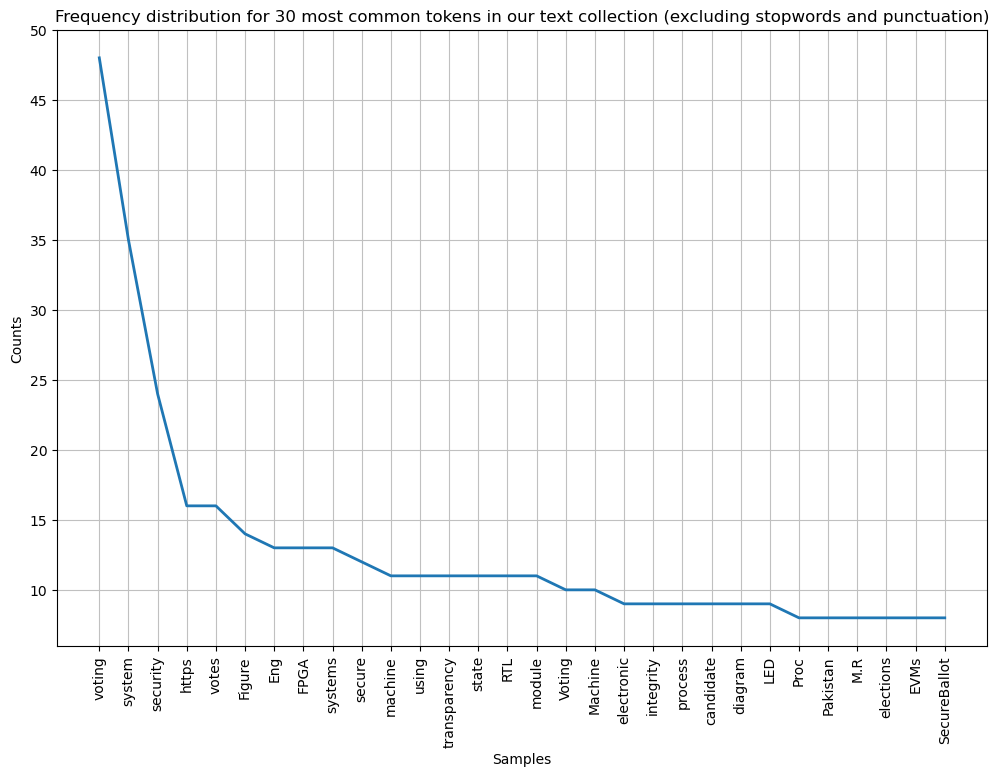

<Axes: title={'center': 'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [32]:
filtered_word_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

The most frequent word is "voting". Note that "voting" and "Voting" are same words but this algirthm ranked voting with small v as teh most frequent word and showed voting with capital v as lower frequent word. This can be a drawback when one has to identify a word frequency in general.

#### Technique 2: WordCloud for Word Visualization:

In [33]:
## Now lets see some visualization to see the frequent terms

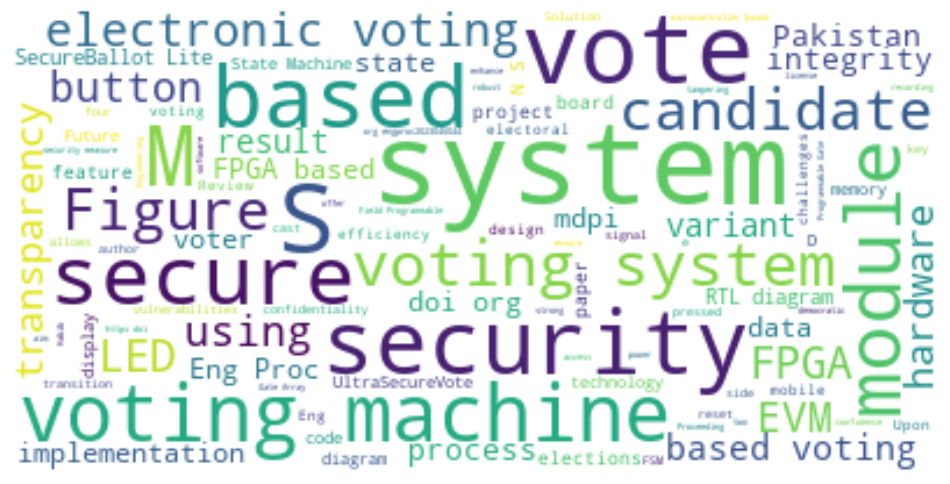

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The above visualization is showing me unwanted stop words. Stop words are the words that are unwanted. I dont want the uselesss words to appear in my visualization.

### Technique 3: WordCloud with Custom Stopwords:

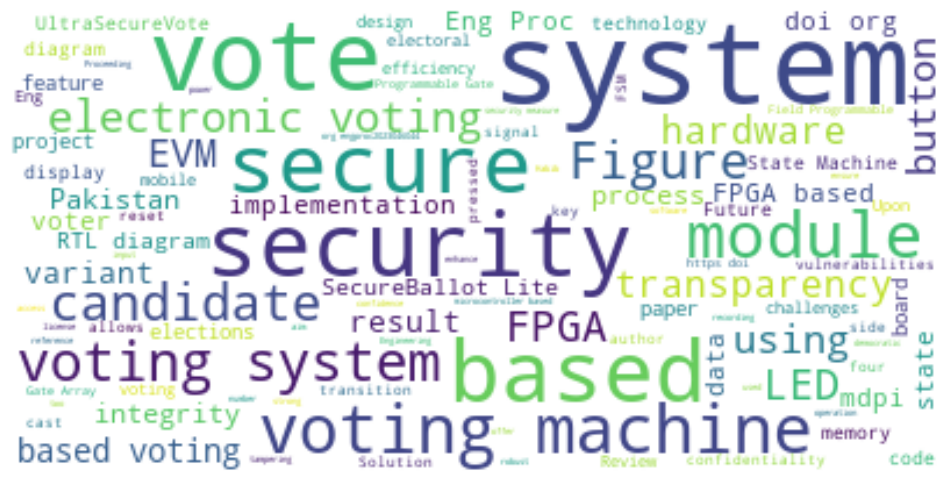

In [37]:
stopwords = set(STOPWORDS)
stopwords.update(["T","G","W" ,"e","J","P","F","C", "D", "S","N", "L","M", "H", "et al", "et", "al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(raw['content'])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now this is much cleaner depiction of most frequent words in the pdf. Voting and system being capital showing they are most repetative.

### Technique 4: Rake_NLTK for Keyword Extraction:

In [40]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]

[(371.3641233766234,
  'evm electronic voting machine fpga field programmable gate array dre direct recording electronic mc mode control rtl register transistor logic fsm finite state machine vl vote logger le led controller module'),
 (46.97577030812325,
  'high secure biometric electronic voting machine using fpga'),
 (46.62258687258687,
  'biometric system based electronic voting machine using arm9 microcontroller'),
 (46.27380952380952, 'direct recording electronic voting machine'),
 (41.19940476190476,
  'xvbb introduction literature review finite state machine'),
 (39.41026194261488,
  'secure mobile internet voting system using biometric authentication'),
 (38.31306306306306, 'system involved conducting tests using simulation soft'),
 (34.34090909090909,
  '12 ], integrating extra hardware components compromised'),
 (31.767316017316016, 'based voting solutions † areeb adnan khan 1'),
 (30.916666666666668, 'mc module carries several tasks')]

The output is a list of ranked phrases along with their corresponding scores, generated by the RAKE (Rapid Automatic Keyword Extraction) algorithm. Each tuple in the list represents a scored phrase, with the first element being the score and the second element being the phrase itself. 
It is giving some information, but there is a lot of noise. 

### Technique 5: Textacy for Keyword Extraction:

In [41]:
import textacy
# from textacy import *
  
#Load a spacy model, which will be used for all further processing. 
en = textacy.load_spacy_lang("en_core_web_sm") 

In [42]:
#convert the text into a spacy document. 
doc = textacy.make_spacy_doc(raw['content'], lang=en) 
  
#Print the keywords using TextRank algorithm, as implemented in Textacy. 
print("Textrank output: \n", textacy.extract.keyterms.textrank(doc, 
                                                             normalize="lemma", 
                                                             topn=5)) 
  
# structured information extraction (textacy.extract)
print("Print all keywords output: \n")
keywords = [kps for kps, weights in 
                            textacy.extract.keyterms.textrank(doc, 
                                                              normalize="lemma")] 
print(keywords) 

Textrank output: 
 [('secure electronic voting system', 0.014546560136515993), ('K. Secure mobile internet voting system', 0.013997474567110112), ('secure online voting system', 0.01375718258732288), ('secure voting system', 0.013085327526962004), ('traditional voting system', 0.011081701863162192)]
Print all keywords output: 

['secure electronic voting system', 'K. Secure mobile internet voting system', 'secure online voting system', 'secure voting system', 'traditional voting system', 'superior voting system', 'security system', 'S.T. electronic voting machine', 'art electronic voting machine', 'reliable voting machine']


This technique is much clearer version than the previous one. The words are much concise and more clearly showing which ones are most important.

### Technique 6: YAKE for Keyword Extraction:

In [44]:
import yake

In [45]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('Voting', 0.002416002771497279)
('voting machine', 0.0024490946919083316)
('electronic voting', 0.002997806691013278)
('voting systems', 0.0031234365525315976)
('system', 0.00501425290543083)
('machine', 0.010711390488841349)
('State Machine', 0.011801405902684158)
('RTL diagram', 0.0124924105275743)
('security', 0.01280057924009781)
('systems', 0.013251954107210051)
('secure voting', 0.014432111587954658)
('FPGA', 0.016181350920729653)
('Secure', 0.01656407799056502)
('electronic', 0.017081637207416067)
('Figure', 0.018322101943865864)
('State', 0.01959822813396004)
('votes', 0.019772680688743927)
('voting process', 0.019934084287982993)
('Voting Solutions', 0.02068493406616318)
('SecureBallot Lite', 0.021927512769668506)


The YAKE algorithm successfully extracts key terms from the analyzed content, revealing a focus on electronic voting systems and their technological intricacies. The identified keywords, such as "Voting Machine," "Electronic Voting," and "FPGA," indicate a discussion on the use of technology in the voting process. Terms like "Security" and "Secure" underscore the importance of robust security measures in electronic voting systems. Additionally, keywords like "Voting Systems" and "Voting Process" suggest a comprehensive exploration of the overall voting procedures and systems.

The techniques employed for word frequency analysis and keyword extraction each exhibit specific shortcomings. NLTK's basic word frequency analysis, while efficient, lacks the capacity to uncover intricate semantic relationships between words. WordCloud visualizations, while intuitive, offer limited insights into the contextual meaning of terms. Rake_NLTK, despite its rapid keyword extraction, may struggle with capturing nuanced semantics and requires careful parameter tuning. Textacy, while more sophisticated with spaCy's linguistic capabilities, demands additional computational resources and libraries. YAKE, although employing statistical methods, has limitations in semantic understanding, requiring thoughtful parameter adjustments. I liked the YAKE most as it gave clearer version of most frequent words and short sentences. 

# 3 the keyword of my choice is "CeaseFireNow"

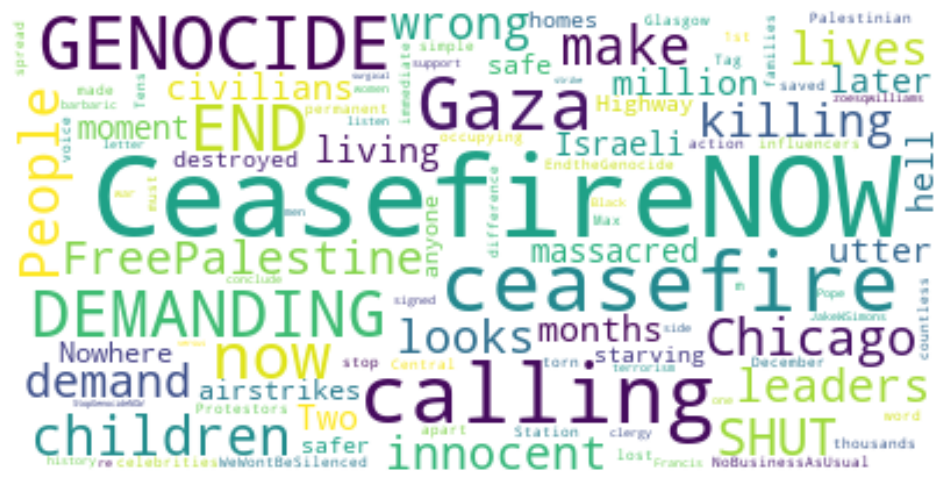

In [55]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Open the file with UTF-8 encoding
with open('twittertext', 'r', encoding='utf-8') as twittertext:
    # Read the content of the file
    corpus = twittertext.read()

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(corpus)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#below word cloud shows CeaseFireNow to be the most important word amongst all tweets.

In [59]:
from textblob import TextBlob

# Read the text file line by line
with open('twittertext', 'r', encoding='utf-8') as file:
    tweets = file.readlines()

# Perform Sentiment Analysis
positive_count = 0
negative_count = 0

for tweet in tweets:
    analysis = TextBlob(tweet)
    
    # Classify the polarity of the tweet
    if analysis.sentiment.polarity > 0:
        positive_count += 1
    elif analysis.sentiment.polarity < 0:
        negative_count += 1

# Show total positive and negative sentiment counts
print("Total Positive Sentiments:", positive_count)
print("Total Negative Sentiments:", negative_count)

# Display one Positive and one Negative sentiment
positive_tweet = next((tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity > 0), None)
negative_tweet = next((tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity < 0), None)

print("\nOne Positive Tweet:")
print(positive_tweet)

print("\nOne Negative Tweet:")
print(negative_tweet)

Total Positive Sentiments: 4
Total Negative Sentiments: 3

One Positive Tweet:
Two months later: 2+ million civilians in #Gaza are living in utter hell. They & their children can be massacred at any moment by Israeli airstrikes. Nowhere is safe. People now starving. 50% homes destroyed. How does this make anyone safer? #CeasefireNOW


One Negative Tweet:
Highway I-55 in Chicago IS SHUT DOWN DEMANDING A CEASEFIRE AND END TO THE GENOCIDE‼️‼️‼️‼️#FreePalestine #NoBusinessAsUsual #CEASEFIRENOW #EndtheGenocide #Chicago #Gaza



The identified positive tweet discusses the dire situation in Gaza, expressing concern about the safety of civilians and calling for a ceasefire. While the content is generally negative, the sentiment analysis might interpret the call for a ceasefire as a positive sentiment, which is reasonable given the context.
The identified negative tweet discusses the shutdown of I-55 in Chicago, demanding a ceasefire and an end to the genocide. The sentiment analysis correctly identifies this tweet as negative, capturing the urgency and frustration associated with the call for a ceasefire and condemnation of the ongoing events in Gaza.
Overall, teh algorithm is moderately good at identofying teh sentiment as in my regard the positive tweet is not much positive either.